<a href="https://colab.research.google.com/github/yaminivemulapalli/Purchase-Recommendation-for-customer-using-KNN/blob/main/purchase_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from datetime import datetime
from scipy.sparse import csr_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import sys

In [ ]:
df=pd.read_excel("/content/drive/MyDrive/online_retail_II.xlsx")

In [ ]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


The above outputs indicate that there are null values in Description,CustomerID attributes
->The Customer Id id in float to handle it it is better to convert it into integer format


In [ ]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


Above o/p describe the statistics of the integer columns


In [ ]:
df[df["StockCode"]=="POST"]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany
927,C489538,POST,POSTAGE,-1,2009-12-01 12:18:00,9.58,15796.0,United Kingdom
...,...,...,...,...,...,...,...,...
522916,537967,POST,POSTAGE,1,2010-12-09 11:31:00,18.00,12494.0,France
522930,537995,POST,POSTAGE,2,2010-12-09 11:39:00,18.00,12712.0,Germany
522974,538003,POST,POSTAGE,8,2010-12-09 12:05:00,18.00,12429.0,Denmark
523064,538008,POST,POSTAGE,5,2010-12-09 12:17:00,18.00,12683.0,France


The data above shows that POST and POSTAGE account for the delivery expenses that customers spend while making purchases online. Based on this information, we can determine which items should be excluded from our analysis.

In [ ]:
df = df[df['StockCode'] != 'POST']
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [ ]:
df = df.dropna(subset=['Customer ID'])
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [ ]:
df_cleaned = df.copy()
df_cleaned.loc[:, 'Customer ID'] = df_cleaned['Customer ID'].astype(int)
df = df_cleaned.copy()
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [ ]:
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [ ]:
df=df[(df['Price']>0) & (df['Quantity']>0)]
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


The negative values of price and quantity are noise so we excluded that data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406926 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      406926 non-null  object        
 1   StockCode    406926 non-null  object        
 2   Description  406926 non-null  object        
 3   Quantity     406926 non-null  int64         
 4   InvoiceDate  406926 non-null  datetime64[ns]
 5   Price        406926 non-null  float64       
 6   Customer ID  406926 non-null  float64       
 7   Country      406926 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


The orders whose invoice starts with C indiactes the cancelled orders check those


In [ ]:
(df["Invoice"].astype(str).str.contains("^C")).sum()


0

The output of is 0 because we have already removed the records whose quantity and price in negative so it indirectly indicates that the Cancelled data is expelled from our df


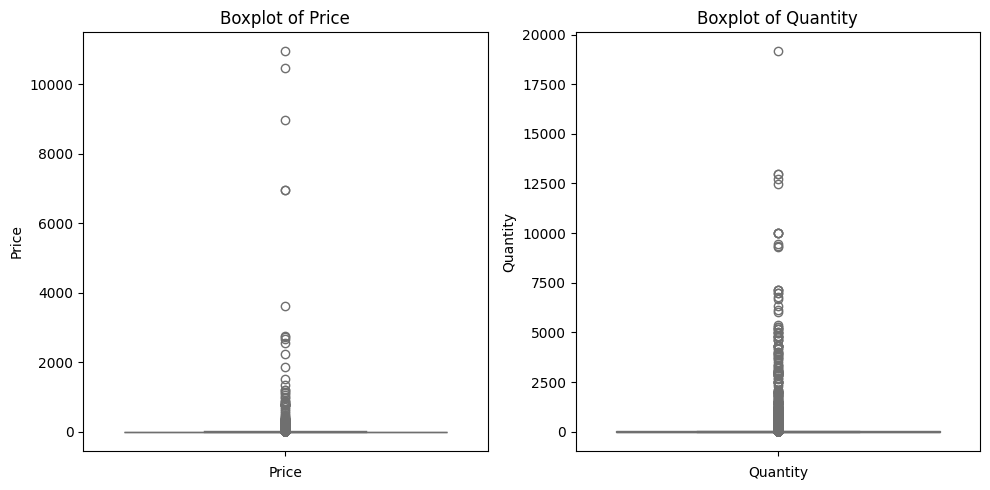

In [ ]:
def check_outliers(dataframe, variable, ax):
    sns.boxplot(dataframe[variable],color='skyblue', ax=ax)
    ax.set_title('Boxplot of '+variable)
    ax.set_xlabel(variable)

columns = ['Price', 'Quantity']
fig, axs = plt.subplots(1, len(columns), figsize=(10, 5))

for i, col in enumerate(columns):
    check_outliers(df, col, axs[i])

plt.tight_layout()
plt.show()


In [ ]:
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
    return outliers

outliers = remove_outliers(df['Price'])
df=df[~outliers]

In [ ]:
df_agg = df.groupby(['Customer ID', 'StockCode'])['Quantity'].sum().reset_index()
df_agg

,Customer ID,StockCode,Quantity
0,12346.0,20679,1
1,12346.0,20682,1
2,12346.0,20685,1
3,12346.0,21523,1
4,12346.0,21524,1
...,...,...,...
251874,18287.0,85039B,48
251875,18287.0,85040A,60
251876,18287.0,85040B,12
251877,18287.0,85199S,24


In [ ]:
pivot_table = df_agg.pivot(index='Customer ID', columns='StockCode', values='Quantity').fillna(0)
pivot_table

StockCode,10002,10080,10109,10120,10125,10133,10134,10135,10138,11001,...,90214W,90214Y,90214Z,ADJUST,D,M,PADS,SP1002,TEST001,TEST002
Customer ID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,1.0
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12351.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18283.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18284.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18285.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
matrix = csr_matrix(pivot_table.values)
matrix

<4263x3699 sparse matrix of type '<class 'numpy.float64'>'
	with 251879 stored elements in Compressed Sparse Row format>

[0, 0, 3, 0]
[4, 0, 0, 0]
[0, 0, 0, 5]
CSR Representation
Data: [3, 4, 5]
These are the non-zero elements.
Indices: [2, 0, 3]
These are the column indices of the non-zero elements.

In [ ]:
# Fit the KNN model to data
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
def recommend_items(user_id, date, n_recommendations=5):
    # Input validation
    if not isinstance(n_recommendations, int) or n_recommendations <= 0:
        print("n_recommendations must be a positive integer.")
        return

    # Handle missing values
    if pivot_table.isnull().any().any() or df.isnull().any().any():
        print("Data contains missing values.")
        return

    # Check if user_id exists in the data else return
    if user_id not in pivot_table.index:
        print(f"User ID {user_id} does not exist in the data.")
        return

    try:
        # Check if date is within range
        min_date = df['InvoiceDate'].min().date()
        max_date = df['InvoiceDate'].max().date()

        # If the date is out of range, just proceed with overall purchase history
        if not min_date <= date <= max_date:
            print(f"Date is out of range. Recommending based on overall purchase history.")

        # Get the top n similar users for a given user
        distances, indices = model_knn.kneighbors(pivot_table.loc[user_id].values.reshape(1, -1), n_neighbors=n_recommendations + 1)

        recommended_items = []

        # Get recommendations from similar users
        for i in range(1, len(distances.flatten())):
            similar_user_id = pivot_table.index[indices.flatten()[i]]
            purchases_by_similar_user = df[(df['Customer ID'] == similar_user_id) & (df['InvoiceDate'].dt.date == date)]

            # If no purchases on the given date, get the most popular items purchased by the similar user
            if purchases_by_similar_user.empty:
                purchases_by_similar_user = df[df['Customer ID'] == similar_user_id]

            for _, row in purchases_by_similar_user.iterrows():
                item = f"{row['StockCode']}: {row['Description']}"
                if item not in recommended_items:
                    recommended_items.append(item)

        if not recommended_items:
            print("No recommendations found.")
            return

        return recommended_items[:n_recommendations]

    except Exception as e:
        print(f"An error occurred: {e}")

customer_id = int(input("Enter customerId: "))
input_date = pd.to_datetime(input("Enter date (YYYY-MM-DD): ")).date()
recommendations = recommend_items(customer_id, input_date)
if recommendations:
    print(f"Recommended items for customer {customer_id} on {input_date}:")
    for item in recommendations:
        print(item)

Enter customerId: 12346
Enter date (YYYY-MM-DD): 2022-12-22
Date is out of range. Recommending based on overall purchase history.
Recommended items for customer 12346 on 2022-12-22:
46000M: POLYESTER FILLER PAD 45x45cm
TEST001: This is a test product.
15056P: EDWARDIAN PARASOL PINK
85014B: RED/WHITE DOTS RUFFLED UMBRELLA
15056BL: EDWARDIAN PARASOL BLACK
